In [35]:
import data_loader
import importlib
importlib.reload(data_loader)

# print(f"Box size1: {BOX_SIZE}")

# Setup
from data_loader import *
import matplotlib.pyplot as plt
import numpy as np


print("BOX_SIZE2:", BOX_SIZE)



Loading bubble data...
✓ Loaded 634277 observations
✓ Timesteps added: 0 to 3426
✓ Identified 300 disappearing bubbles
Applying periodic boundary corrections...
✓ Periodic boundary correction applied
✓ Derived quantities computed

DATA LOADING COMPLETE
Total observations:       634,277
Unique bubbles:           400
Timesteps:                0 to 3426
Disappearing bubbles:     300
Box size:                 22.36068
Initial avg area (A_0):   1.000000

Available variables:
  - df: Original dataframe
  - df_corrected: Corrected dataframe with actual_area column
  - disappearing_ids: Set of disappearing bubble IDs
  - bubbles_per_timestep: Number of bubbles at each timestep
  - avg_area_per_timestep: Average bubble area at each timestep
  - approx_avg_area: Approximate area from liquid fraction
  - A_0: Initial average bubble area
  - max_timestep: Maximum timestep
  - final_step: Final timestep
  - box_area: Total box area
  - BOX_SIZE, PERIODIC_THRESHOLD, LIQUID_FRACTION: Constants

BOX_S

In [36]:
import os, sys
print("cwd:", os.getcwd())
print("sys.path[0]:", repr(sys.path[0]))
print("first 5 sys.path:", [repr(p) for p in sys.path[:5]])

import data_loader
print("imported from:", data_loader.__file__)
print("DATA_FILE in module:", getattr(data_loader, "DATA_FILE", None))
print("BOX_SIZE in module:", getattr(data_loader, "BOX_SIZE", None))

import importlib
importlib.reload(data_loader)
print("reloaded from:", data_loader.__file__)
print("DATA_FILE in module:", getattr(data_loader, "DATA_FILE", None))
print("BOX_SIZE in module:", getattr(data_loader, "BOX_SIZE", None))

cwd: /Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/ProjectNotebooks
sys.path[0]: '/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip'
first 5 sys.path: ["'/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python39.zip'", "'/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9'", "'/Library/Developer/CommandLineTools/Library/Frameworks/Python3.framework/Versions/3.9/lib/python3.9/lib-dynload'", "''", "'/Users/conorkirby/Library/Python/3.9/lib/python/site-packages'"]
imported from: /Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/ProjectNotebooks/data_loader.py
DATA_FILE in module: /Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/DataFiles/wetfoam2_bub_RH2_0.200000_0.501910.txt
BOX_SIZE in module: 22.36068
Loading

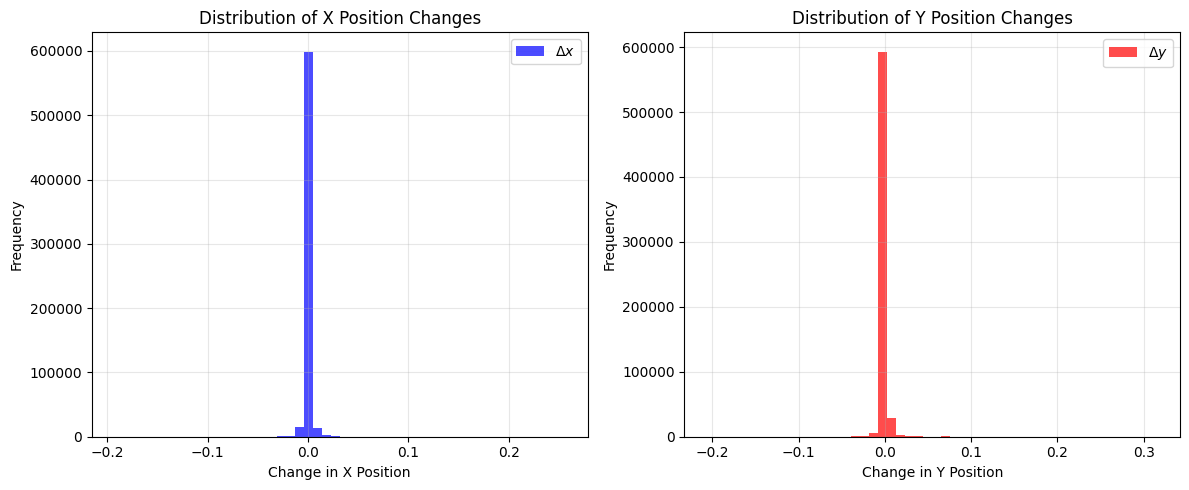

Total changes analyzed: 633877
Mean change in x (all bubbles): 0.000014
Mean change in y (all bubbles): 0.000094


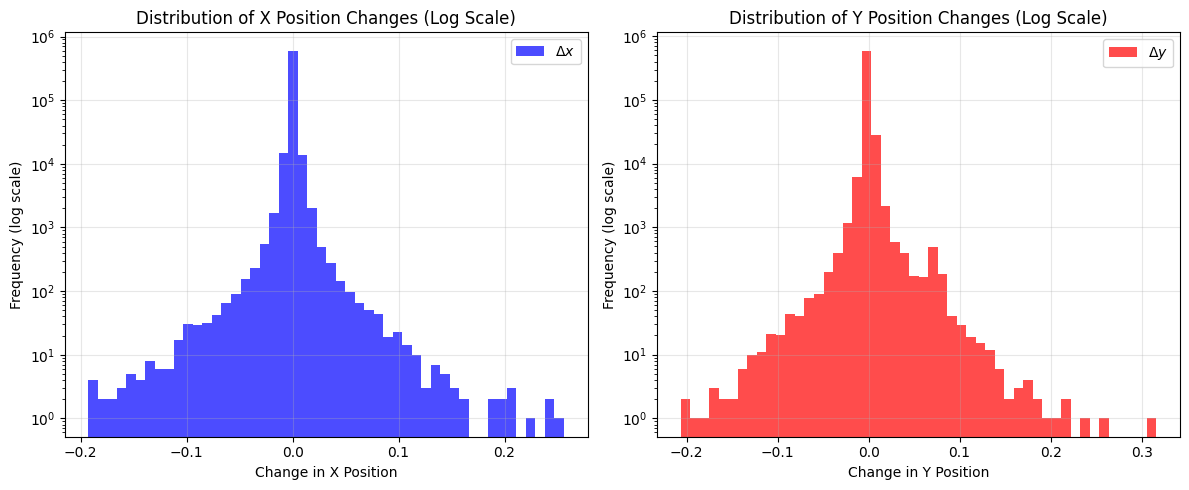

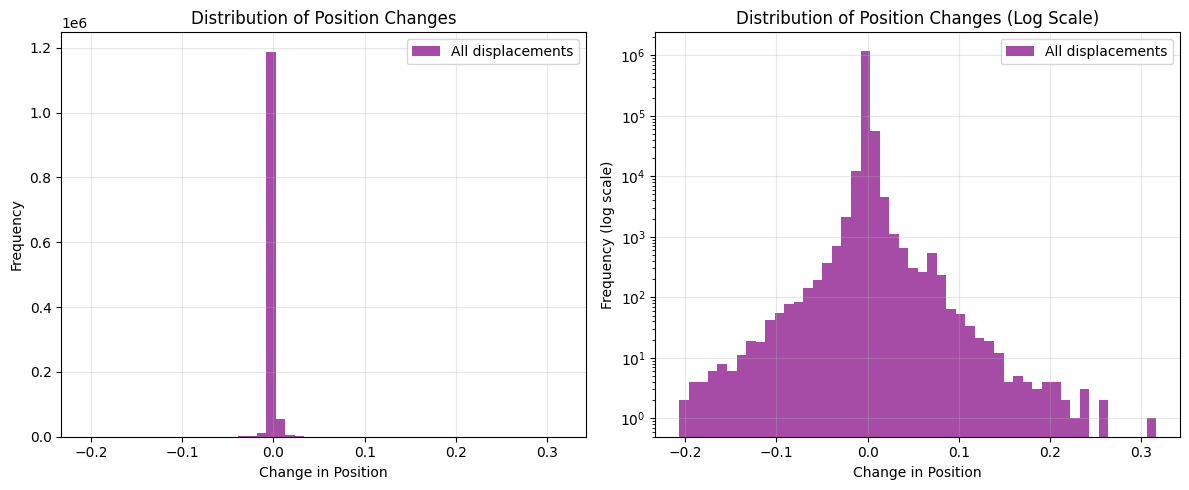

Total position changes analyzed: 1267754
Mean change in position (all directions): 0.000054
Standard deviation of changes: 0.004466


In [37]:
# Collect all position changes from all bubbles
all_changes_x = []
all_changes_y = []

for bubble_id, g in df_corrected.groupby("id"):
    g = g.sort_values("timestep").copy()
    
    if len(g) < 2:  # Need at least 2 points to calculate changes
        continue
        
    # Use corrected positions directly
    x = g["x"].to_numpy()
    y = g["y"].to_numpy()
    
    changes_x = np.diff(x)
    changes_y = np.diff(y)
    
    all_changes_x.extend(changes_x)
    all_changes_y.extend(changes_y)

# Plot histogram of all changes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(all_changes_x, bins=50, alpha=0.7, label=r'$\Delta x$', color='blue')
plt.xlabel('Change in X Position')
plt.ylabel('Frequency')
plt.title('Distribution of X Position Changes')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(all_changes_y, bins=50, alpha=0.7, label=r'$\Delta y$', color='red')
plt.xlabel('Change in Y Position')
plt.ylabel('Frequency')
plt.title('Distribution of Y Position Changes')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
#plt.savefig("/Users/conorkirby/projects/python/Capstone/Figures/bubble_displacement_histograms.png", dpi=300)
plt.show()

print(f"Total changes analyzed: {len(all_changes_x)}")
print(f"Mean change in x (all bubbles): {np.mean(all_changes_x):.6f}")
print(f"Mean change in y (all bubbles): {np.mean(all_changes_y):.6f}")


# Plot the same histograms with log scale
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(all_changes_x, bins=50, alpha=0.7, label=r'$\Delta x$', color='blue', log=True)
plt.xlabel('Change in X Position')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of X Position Changes (Log Scale)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(all_changes_y, bins=50, alpha=0.7, label=r'$\Delta y$', color='red', log=True)
plt.xlabel('Change in Y Position')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Y Position Changes (Log Scale)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
#plt.savefig("/Users/conorkirby/projects/python/Capstone/Figures/bubble_displacement_histograms_log.png", dpi=300)
plt.show()


# Combine x and y changes for overall displacement distribution
all_changes = np.concatenate([all_changes_x, all_changes_y])

plt.figure(figsize=(12, 5))

# Linear scale histogram
plt.subplot(1, 2, 1)
plt.hist(all_changes, bins=50, alpha=0.7, color='purple', label='All displacements')
plt.xlabel('Change in Position')
plt.ylabel('Frequency')
plt.title('Distribution of Position Changes')
plt.grid(True, alpha=0.3)
plt.legend()

# Log scale histogram
plt.subplot(1, 2, 2)
plt.hist(all_changes, bins=50, alpha=0.7, color='purple', label='All displacements', log=True)
plt.xlabel('Change in Position')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Position Changes (Log Scale)')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
#plt.savefig("/Users/conorkirby/projects/python/Capstone/Figures/bubble_displacement_histograms_combined.png", dpi=300)
plt.show()

print(f"Total position changes analyzed: {len(all_changes)}")
print(f"Mean change in position (all directions): {np.mean(all_changes):.6f}")
print(f"Standard deviation of changes: {np.std(all_changes):.6f}")


Δt=1: n=1267754, mean=0.00005, var=0.00002
Δt=10: n=1260554, mean=0.00055, var=0.00058
Δt=25: n=1248554, mean=0.00139, var=0.00210
Δt=50: n=1228628, mean=0.00282, var=0.00555
Δt=75: n=1209292, mean=0.00426, var=0.00975
Δt=100: n=1190584, mean=0.00570, var=0.01446


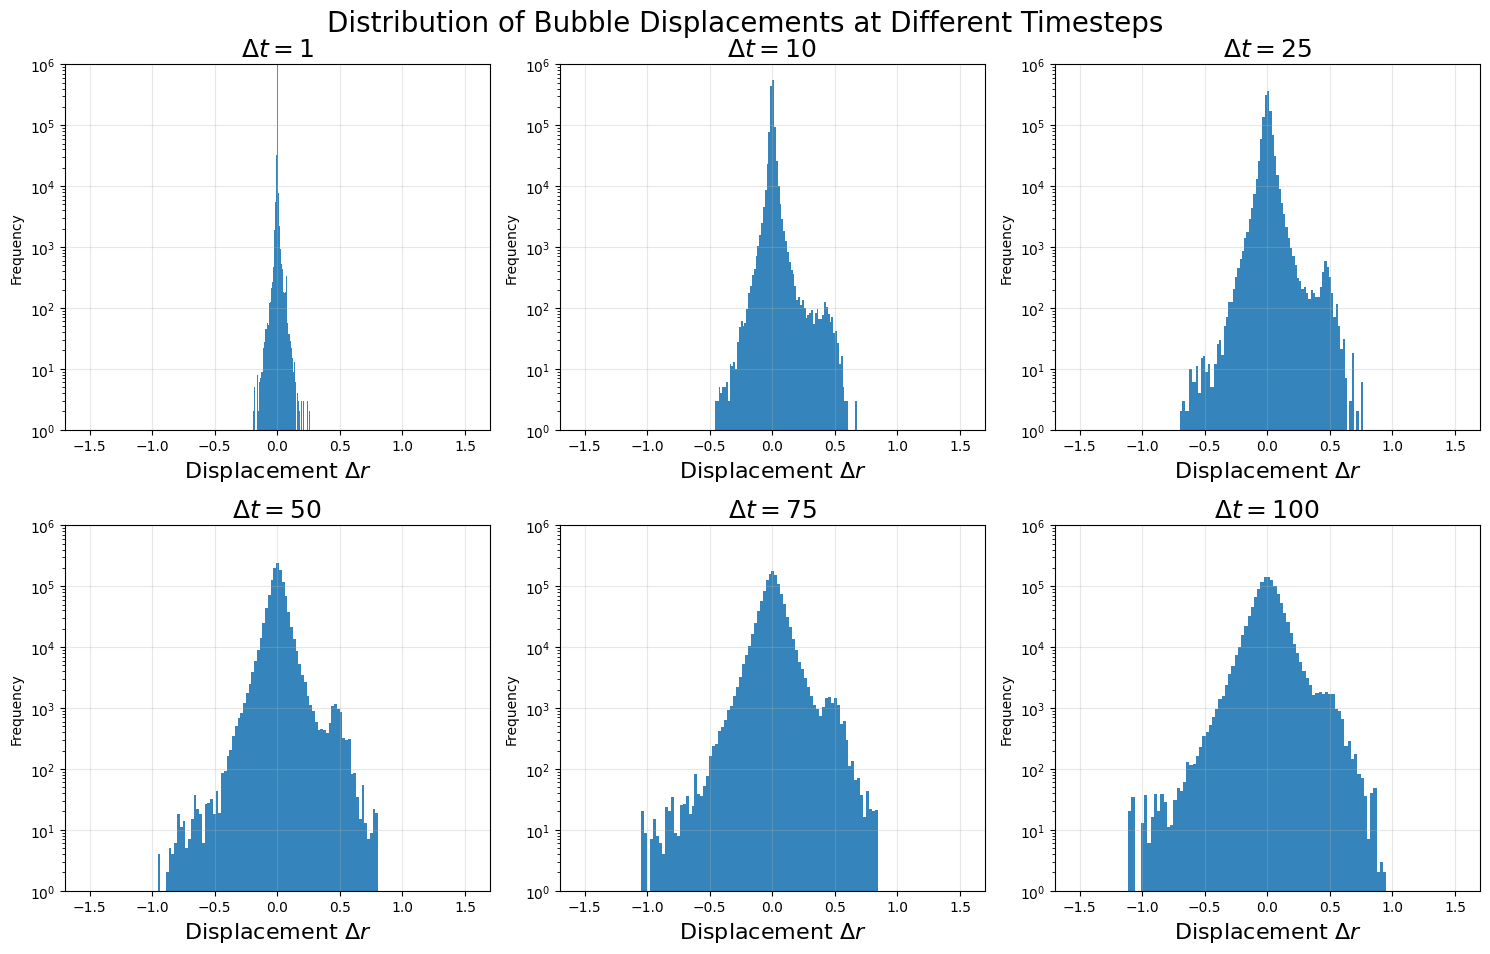

In [38]:

# Displacement Analysis for Multiple dt Values
#dt_values = [1, 10, 25, 50, 75, 125, 200, 300, 400, 500]
dt_values = [1, 10, 25, 50, 75, 100]

fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
plt.suptitle('Distribution of Bubble Displacements at Different Timesteps', 
             fontsize=20, y=0.95)

for idx, dt in enumerate(dt_values):
    all_dx, all_dy = [], []
    
    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x, y = g["x"].to_numpy(), g["y"].to_numpy()
        
        if len(x) <= dt:
            continue
        
        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)
    
    all_disp = np.concatenate([all_dx, all_dy])
    axs[idx].hist(all_disp, bins=80, alpha=0.9)
    axs[idx].set_title(rf"$\Delta t = {dt}$", fontsize=18)
    axs[idx].grid(alpha=0.3)
    axs[idx].set_yscale('log')
    axs[idx].set_xlim(-1.7, 1.7)
    axs[idx].set_ylim(1, 1e6)
    axs[idx].set_xlabel(r"Displacement $\Delta r$", fontsize=16)
    axs[idx].set_ylabel("Frequency")
    
    print(f"Δt={dt}: n={len(all_disp)}, mean={np.mean(all_disp):.5f}, var={np.var(all_disp):.5f}")

plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/03_Figures/displacement_distributions_2.png", dpi=300, bbox_inches='tight')
plt.show()


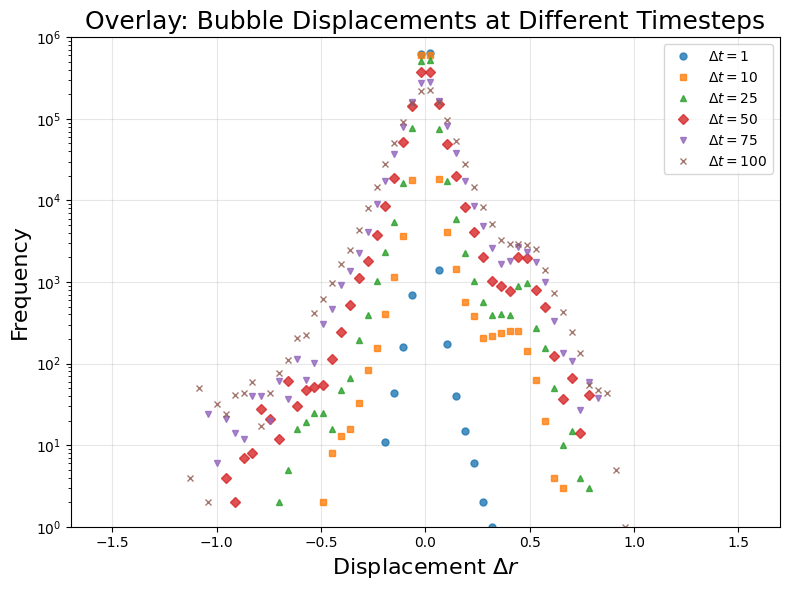

In [39]:
# Overlay Plot
plt.figure(figsize=(8, 6))

markers = ['o', 's', '^', 'D', 'v', 'x']

for idx, dt in enumerate(dt_values):
    all_dx, all_dy = [], []
    
    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x, y = g["x"].to_numpy(), g["y"].to_numpy()
        
        if len(x) <= dt:
            continue
        
        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)
    
    all_disp = np.concatenate([all_dx, all_dy])
    
    counts, bin_edges = np.histogram(all_disp, bins=80, range=(-1.7, 1.7))
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    plt.plot(bin_centers, counts, marker=markers[idx % len(markers)],
             linestyle='none', label=rf'$\Delta t = {dt}$', alpha=0.8, markersize=5)

plt.yscale('log')
plt.xlim(-1.7, 1.7)
plt.ylim(1, 1e6)
plt.xlabel(r"Displacement $\Delta r$", fontsize=16)
plt.ylabel("Frequency", fontsize=16)
plt.title("Overlay: Bubble Displacements at Different Timesteps", fontsize=18)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/03_Figures/displacement_overlay_2.png", dpi=300, bbox_inches='tight')
plt.show()


/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_4599/1563658378.py:50: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0, 1e6)  # adjust if needed after you pick top_peak


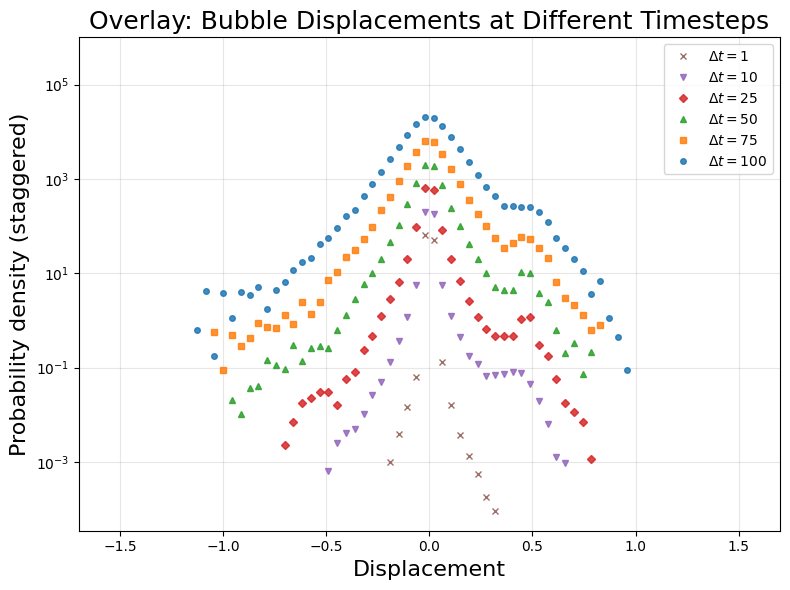

In [40]:

# Overlay with centred x and staggered (log) peaks
plt.figure(figsize=(8, 6))

markers = ['o', 's', '^', 'D', 'v', 'x']

# make sure order is from largest dt (highest) to smallest dt (lowest)
dt_plot_order = sorted(dt_values, reverse=True)

# choose where you want the top peak to sit and how much to separate peaks (in log10 decades)
top_peak = 2e4        # try 2e4 or 5e4 depending on your ylim
decade_step = 0.50    # ~0.50 decades separation (~3.16x in linear). Tweak to taste.

for idx, dt in enumerate(dt_plot_order):
    all_dx, all_dy = [], []

    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x, y = g["x"].to_numpy(), g["y"].to_numpy()
        if len(x) <= dt:
            continue
        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)

    # concatenate and centre so the peak sits at x ~ 0
    all_disp = np.concatenate([all_dx, all_dy])
    all_disp -= all_disp.mean()

    # histogram as a probability density (PDF)
    bins = 80
    rng = (-1.7, 1.7)
    counts, bin_edges = np.histogram(all_disp, bins=bins, range=rng, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # scale so that peaks are staggered on a log axis
    current_peak = counts.max() if counts.max() > 0 else 1.0
    target_peak = top_peak * (10 ** (-decade_step * idx))  # 700 highest, then step down
    scale = target_peak / current_peak
    counts_scaled = counts * scale

    plt.plot(
        bin_centers, counts_scaled,
        marker=markers[idx % len(markers)], linestyle='none',
        label=rf'$\Delta t = {dt}$', alpha=0.85, markersize=4
    )

plt.yscale('log')
plt.xlim(-1.7, 1.7)
plt.ylim(0, 1e6)  # adjust if needed after you pick top_peak
plt.xlabel(r"Displacement", fontsize=16)
plt.ylabel("Probability density (staggered)", fontsize=16)
plt.title("Overlay: Bubble Displacements at Different Timesteps", fontsize=18)
plt.grid(alpha=0.3)
plt.legend(loc="upper right")
# reverse legend order
handles, labels = plt.gca().get_legend_handles_labels()
plt.gca().legend(handles[::-1], labels[::-1], loc="upper right")
plt.tight_layout()
plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/03_Figures/displacement_overlay_shifted_peaks.png", dpi=300, bbox_inches='tight')
plt.show()

# reverse legend order
# change dt's

### Empirical CDF and Complementary CDF (example)

- The empirical cumulative distribution function (CDF) F(x) is the fraction of samples ≤ x.
- Efficient computation used here: F = np.searchsorted(vals_sorted, X, side='right') / n — with side='right' ties count as ≤ X.
- The complementary CDF is CCDF = 1.0 - F.

Numeric example (compact)
- vals_sorted = [1, 2, 3, 5], X = [0, 2, 4, 6], n = 4.
- 0 would be inserted at index 0 (no elements ≤ 0),
- 2 would be inserted to the right of existing 2 (so index 2, counting 1 and 2),
- 4 would be inserted at index 3 (1,2,3 are ≤4),
- searchsorted returns [0, 2, 3, 4] → F = [0.0, 0.5, 0.75, 1.0] → CCDF = [1.0, 0.5, 0.25, 0.0].


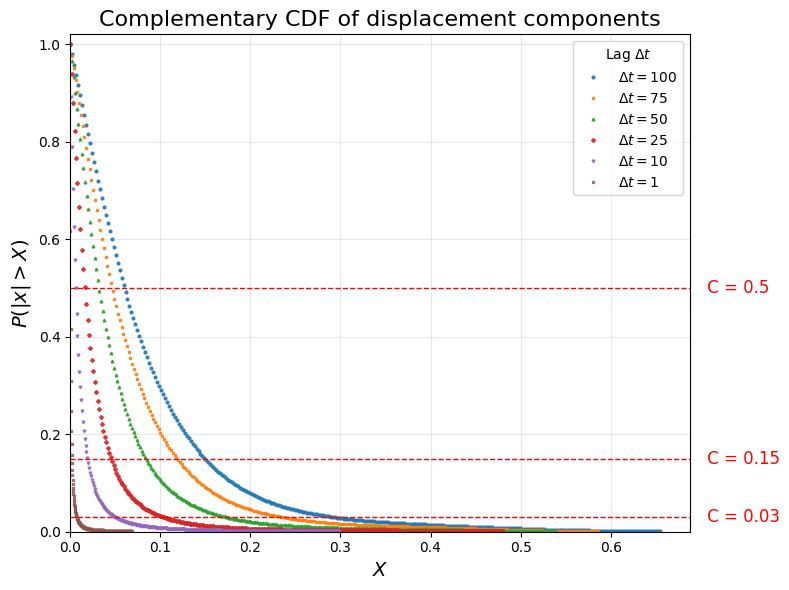

In [41]:

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

# Choose the C (probability) levels for horizontal cuts
C_vals = [0.50, 0.15, 0.03]

# Plot largest dt first so it is on top in legend
dt_plot_order = sorted(dt_values, reverse=True)

for idx, dt in enumerate(dt_plot_order):
    all_dx, all_dy = [], []

    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x, y = g["x"].to_numpy(), g["y"].to_numpy()
        if len(x) <= dt:
            continue
        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)

    # radial step sizes:
    # disp = np.sqrt(np.array(all_dx)**2 + np.array(all_dy)**2)
    disp = np.concatenate([all_dx, all_dy])

    vals = np.abs(disp) 
    vals_sorted = np.sort(vals)
    n = vals_sorted.size

    # A smooth X grid up to the 99.9th percentile
    X = np.linspace(0, np.quantile(vals_sorted, 0.999), 300)

    # Empirical CCDF: P(|x| > X)
    F = np.searchsorted(vals_sorted, X, side='right') / n 
    CCDF = 1.0 - F

    plt.plot(
        X, CCDF, marker=markers[idx % len(markers)],
        linestyle='none', ms=2, alpha=0.85,
        label=rf'$\Delta t = {dt}$'
    )

# Dashed lines for C values
for C in C_vals:
    plt.axhline(y=C, color='red', linestyle='--', linewidth=1)
    plt.text(
        1.02 * plt.xlim()[1], C, f" C = {C}",
        va='center', ha='left', fontsize=12, color='red'
    )

# Axis scaling and labels
plt.ylim(0, 1.02)
plt.xlim(left=0)
plt.ylabel(r"$P(|x|>X)$", fontsize=14)
plt.xlabel(r"$X$", fontsize=14)
plt.title("Complementary CDF of displacement components", fontsize=16)
plt.grid(alpha=0.3)
plt.legend(title=r"Lag $\Delta t$")
plt.tight_layout()
plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/03_Figures/ccdf_displacement_components_2.png", dpi=300, bbox_inches='tight')
plt.show()

# do it with simpsons and trapeziodal rule too

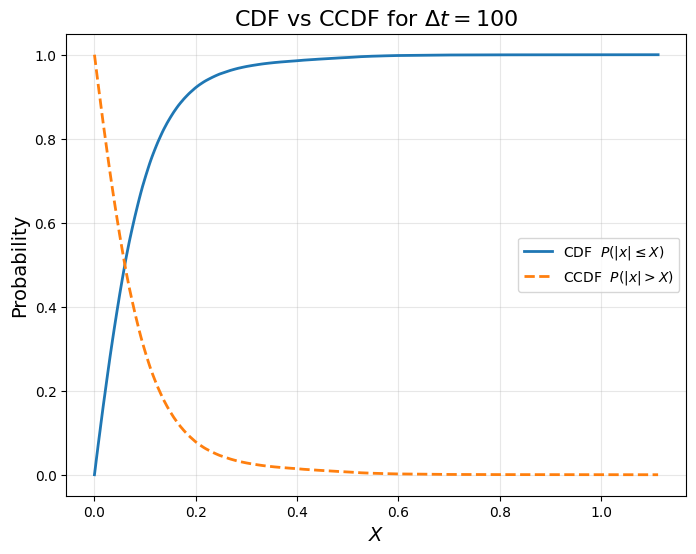

In [42]:
# CCDF vs CDF for a chosen dt
dt = 100   # any dt from the dt_values list

all_dx, all_dy = [], []
for bubble_id, g in df_corrected.groupby("id"):
    g = g.sort_values("timestep").copy()
    x, y = g["x"].to_numpy(), g["y"].to_numpy()
    if len(x) <= dt:
        continue
    dx_dt = x[dt:] - x[:-dt]
    dy_dt = y[dt:] - y[:-dt]
    all_dx.extend(dx_dt)
    all_dy.extend(dy_dt)

# use radial displacements (can switch to component if preferred)
# disp = np.sqrt(np.array(all_dx)**2 + np.array(all_dy)**2)
disp = np.concatenate([all_dx, all_dy]) # use component displacements
vals = np.abs(disp)
vals_sorted = np.sort(vals)
n = len(vals_sorted)

# empirical CDF:  P(|x| ≤ X)
F = np.arange(1, n + 1) / n
# empirical CCDF: P(|x| > X)
CCDF = 1.0 - F

plt.figure(figsize=(8, 6))
plt.plot(vals_sorted, F, label="CDF  $P(|x| \leq X)$", lw=2)
plt.plot(vals_sorted, CCDF, label="CCDF  $P(|x| > X)$", lw=2, linestyle="--")

plt.xlabel(r"$X$", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.title(fr"CDF vs CCDF for $\Delta t = {dt}$", fontsize=16)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

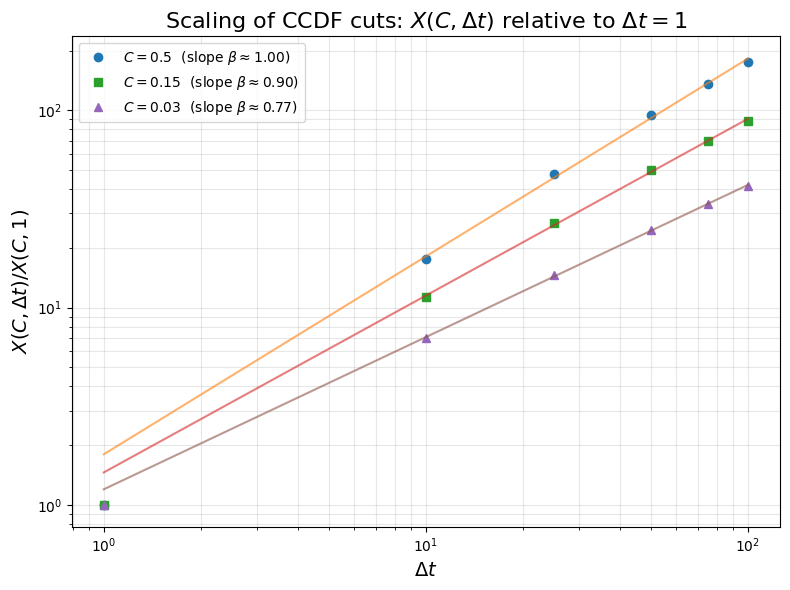

In [43]:
# === Horizontal cuts of CCDF and scaling plot ===

# choose the C levels
C_vals = [0.50, 0.15, 0.03]   

radial = False  # True = use r = sqrt(dx^2+dy^2), False = use |component| (Δx & Δy pooled)

def get_abs_displacements(dt):
    """Return |x| sample used in CCDF: either radial or component magnitude."""
    all_dx, all_dy = [], []
    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x, y = g["x"].to_numpy(), g["y"].to_numpy()
        if len(x) <= dt:
            continue
        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)
    all_dx = np.asarray(all_dx)
    all_dy = np.asarray(all_dy)
    if radial:
        vals = np.sqrt(all_dx**2 + all_dy**2)
    else:
        vals = np.abs(np.concatenate([all_dx, all_dy]))
    return np.abs(vals)

# ensure dt=1 exists as the normalization reference
dt_plot_order = sorted(dt_values)
#assert dt_plot_order[0] == 1 or 1 in dt_plot_order, "Need Δt=1 in dt_values to form the ratio."

# precompute |x| samples for each Δt once (can be large)
abs_samples = {dt: get_abs_displacements(dt) for dt in dt_plot_order if len(get_abs_displacements(dt))}

# compute X(C, dt) for each level and dt
X_C_dt = {C: {} for C in C_vals}
for C in C_vals:
    q = 1.0 - C  # CCDF level C corresponds to quantile q=1-C
    for dt, vals in abs_samples.items():
        if len(vals) == 0:
            continue
        X_C_dt[C][dt] = float(np.quantile(vals, q))

# make the scaling plot: X(C, dt) / X(C, 1) vs dt
plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

for i, C in enumerate(C_vals):
    dts = np.array(sorted(X_C_dt[C].keys()))
    Xs  = np.array([X_C_dt[C][dt] for dt in dts])
    # normalize by dt=1 value (guard if missing)
    if 1 not in X_C_dt[C]:
        raise ValueError("dt=1 missing; cannot normalize.")
    X1 = X_C_dt[C][1]
    ratio = Xs / X1

    # log–log fit 
    # ratio ≈ A * dt^beta  => log(ratio) = log(A) + beta*log(dt)
    mask = dts != 1         # exclude dt==1;
    dts_fit = dts[mask]
    ratio_fit = ratio[mask]

    beta, logA = np.polyfit(np.log(dts_fit), np.log(ratio_fit), 1)[0], np.polyfit(np.log(dts_fit), np.log(ratio_fit), 1)[1]
    A = np.exp(logA)
    fit_curve = A * dts**beta

    plt.loglog(dts, ratio, marker=markers[i % len(markers)], linestyle='none',
               label=fr'$C={C}$  (slope $\beta\approx{beta:.2f}$)')
    plt.loglog(dts, fit_curve, linestyle='-', alpha=0.6)

plt.xlabel(r'$\Delta t$', fontsize=14)
plt.ylabel(r'$X(C,\Delta t)/X(C,1)$', fontsize=14)
plt.title('Scaling of CCDF cuts: $X(C,\Delta t)$ relative to $\Delta t=1$', fontsize=16)
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/03_Figures/ccdf_cut_scaling_2.png", dpi=300, bbox_inches='tight')
plt.show()

# try plotting log of data

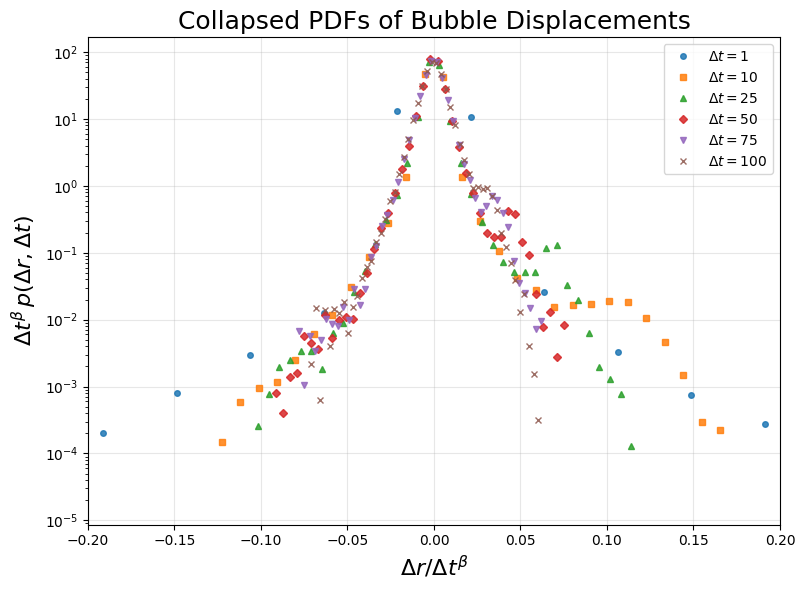

In [44]:
# Test collapse.
# ==== Collapse signed displacement PDFs for bubbles ====
# assume you already have: dt_values, df_corrected, and a fitted beta (e.g. from CCDF cuts)
beta_collapse = 0.6   # or set manually, e.g. beta_collapse = 0.5

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

# use same dt set and sorting as before
dt_plot_order = sorted(dt_values)

for idx, dt in enumerate(dt_plot_order):
    all_dx, all_dy = [], []

    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x = g["x"].to_numpy()
        y = g["y"].to_numpy()
        if len(x) <= dt:
            continue

        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]

        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)

    # signed displacements (NO abs)
    all_disp = np.concatenate([all_dx, all_dy])

    if len(all_disp) == 0:
        continue

    # optional: recentre to remove tiny drift
    all_disp = all_disp - all_disp.mean()

    # histogram as PDF over symmetric range (like your original plot)
    bins = 80
    rng = (-1.7, 1.7)
    counts, bin_edges = np.histogram(all_disp, bins=bins, range=rng, density=True)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    # scaling factor s(dt) = dt^beta
    s_dt = dt ** beta_collapse

    # rescale x and p(x) according to dynamic scaling ansatz
    x_scaled   = bin_centers / s_dt
    pdf_scaled = counts * s_dt

    plt.plot(
        x_scaled, pdf_scaled,
        marker=markers[idx % len(markers)],
        linestyle='none',
        alpha=0.85,
        markersize=4,
        label=rf'$\Delta t = {dt}$'
    )

# you can use log or linear y depending on what you want to see
plt.yscale('log')      # comment this out for linear y
# plt.ylim(1e-3, 1e5)  # tweak if needed

plt.xlabel(r"$\Delta r / \Delta t^{\beta}$", fontsize=16)
plt.ylabel(r"$\Delta t^{\beta} \, p(\Delta r, \Delta t)$", fontsize=16)
plt.title("Collapsed PDFs of Bubble Displacements", fontsize=18)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.xlim(-0.2, 0.2)
plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/03_Figures/displacement_pdf_collapse_beta06_2.png", dpi=300, bbox_inches='tight')
plt.show()

## Fitting Lévy Distribution

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import levy_stable
from scipy.optimize import curve_fit

#redoing what i do above but in a function to get the x_peak and y_peak data for fitting later
def build_collapsed_displacement_pdfs(df_corrected,
                                      dt_values,
                                      beta_collapse,
                                      x_cut=0.05,
                                      bins=80,
                                      rng=(-1.7, 1.7)):
    collapse_dict = {}
    x_peak_list, y_peak_list = [], []

    for dt in sorted(dt_values):
        all_dx, all_dy = [], []

        # collect step displacements for this Δt
        for bubble_id, g in df_corrected.groupby("id"):
            g = g.sort_values("timestep").copy()
            x = g["x"].to_numpy() # to numpy array
            y = g["y"].to_numpy()
            if len(x) <= dt:
                continue

            dx_dt = x[dt:] - x[:-dt] # compute displacements
            dy_dt = y[dt:] - y[:-dt] 

            all_dx.extend(dx_dt) # accumulate displacements outside loop
            all_dy.extend(dy_dt)

        all_disp = np.concatenate([all_dx, all_dy])
        if len(all_disp) == 0:
            continue

        # recentre to remove tiny drift
        all_disp = all_disp - all_disp.mean()

        # PDF histogram
        counts, bin_edges = np.histogram(all_disp, bins=bins, range=rng, density=True)
        bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

        # scaling factor s(Δt) = Δt^β
        s_dt = dt ** beta_collapse

        x_scaled = bin_centers / s_dt
        pdf_scaled = counts * s_dt

        collapse_dict[dt] = (x_scaled, pdf_scaled)

        # collect near-peak data for fitting
        mask = np.abs(x_scaled) < x_cut
        x_peak_list.append(x_scaled[mask])
        y_peak_list.append(pdf_scaled[mask])

    x_peak = np.concatenate(x_peak_list)
    y_peak = np.concatenate(y_peak_list)

    return collapse_dict, x_peak, y_peak

In [46]:
def fit_levy_peak(x_peak, y_peak, beta_collapse, fit_loc=False):
    alpha = 1.0 / beta_collapse

    if fit_loc:
        def model(x, scale, loc):
            return levy_stable.pdf(x, alpha, 0.0, loc=loc, scale=scale)
        p0 = [0.01, 0.0]  # initial guesses
        popt, pcov = curve_fit(model, x_peak, y_peak, p0=p0)
        scale_fit, loc_fit = popt
    else:
        def model(x, scale):
            return levy_stable.pdf(x, alpha, 0.0, loc=0.0, scale=scale)
        p0 = [0.01] # initial guess for scale
        popt, pcov = curve_fit(model, x_peak, y_peak, p0=p0)
        scale_fit = popt[0]
        loc_fit = 0.0

    return alpha, scale_fit, loc_fit

In [47]:
def levy_collapse_analysis(df_corrected,
                           dt_values,
                           beta_collapse=0.62,
                           x_cut=0.05,
                           bins=80,
                           rng=(-1.7, 1.7),
                           fit_loc=False,
                           make_plot=True):
    """
    Full pipeline:
    - build collapsed PDFs
    - fit Lévy-stable peak
    - optionally plot collapse + Lévy fit

    Returns
    -------
    alpha, scale, loc, collapse_dict
    """
    # 1. Build collapse + peak data
    collapse_dict, x_peak, y_peak = build_collapsed_displacement_pdfs(
        df_corrected, dt_values, beta_collapse,
        x_cut=x_cut, bins=bins, rng=rng
    )

    # 2. Fit Lévy peak
    alpha, scale, loc = fit_levy_peak(x_peak, y_peak,
                                      beta_collapse=beta_collapse,
                                      fit_loc=fit_loc)

    if make_plot:
        plt.figure(figsize=(8, 6))

        # collapsed PDFs
        markers = ['o', 's', '^', 'D', 'v', 'x']
        for idx, dt in enumerate(sorted(collapse_dict.keys())):
            x_scaled, pdf_scaled = collapse_dict[dt]
            plt.plot(
                x_scaled, pdf_scaled,
                marker=markers[idx % len(markers)],
                linestyle='none',
                alpha=0.6,
                markersize=4,
                label=rf'$\Delta t = {dt}$'
            )

        # Lévy fit curve (peak region)
        x_fit = np.linspace(x_peak.min(), x_peak.max(), 400)
        if fit_loc:
            y_fit = levy_stable.pdf(x_fit, alpha, 0.0, loc=loc, scale=scale)
        else:
            y_fit = levy_stable.pdf(x_fit, alpha, 0.0, loc=0.0, scale=scale)

        plt.plot(x_fit, y_fit, 'k-', lw=2,
                 label=fr'Lévy fit, $\alpha={alpha:.2f}$')

        plt.yscale('log')
        plt.xlabel(r"$\Delta r / \Delta t^{\beta}$", fontsize=16)
        plt.ylabel(r"$\Delta t^{\beta} p(\Delta r,\Delta t)$", fontsize=16)
        plt.title("Collapsed PDFs with Lévy Peak Fit", fontsize=18)
        plt.grid(alpha=0.3)
        plt.xlim(-0.1, 0.1)
        plt.legend()
        plt.tight_layout()
        plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures_Sample2/03_Figures/displacement_pdf_collapse_levy_fit_2.png", dpi=300, bbox_inches='tight')
        plt.show()

    return alpha, scale, loc, collapse_dict

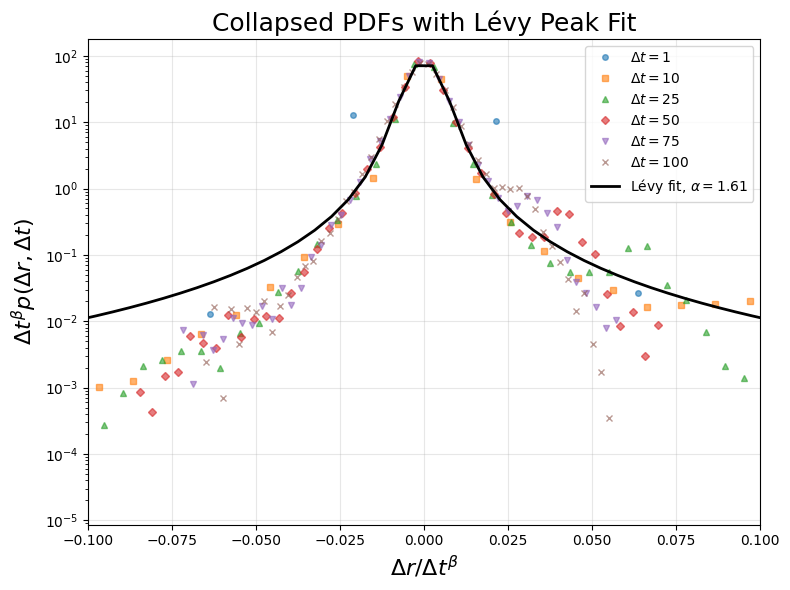

Lévy parameters:
  alpha = 1.613  (should be ~ 1/beta ≈ 1.613)
  scale = 0.003368
  loc   = 0


In [48]:
beta_est = 0.62   # your best value from MSD/CCDF
alpha, scale, loc, collapse_dict = levy_collapse_analysis(
    df_corrected,
    dt_values,
    beta_collapse=beta_est,
    x_cut=1,        # how much of the peak to use
    fit_loc=False,     # or True if you want to allow a small shift
    make_plot=True
)

print("Lévy parameters:")
print(f"  alpha = {alpha:.3f}  (should be ~ 1/beta ≈ {1/beta_est:.3f})")
print(f"  scale = {scale:.4g}")
print(f"  loc   = {loc:.4g}")

# Other scalings 🛩️🐜
## Scaling Analysis Using Distribution Maxima

Determining the scaling exponent by tracking how the peak (maximum) of the displacement distribution changes with timestep Δt. Plotting these maximum values versus Δt on a log-log scale yields a slope that serves as the scaling factor β for collapsing the probability distributions.

slope = -0.4225  →  beta_peak ≈ 0.4225


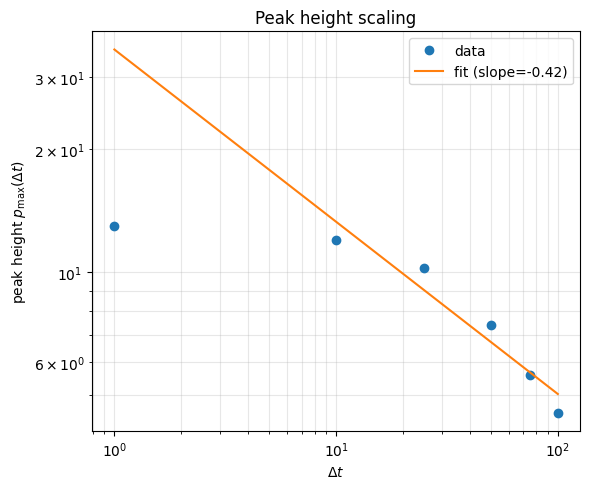

In [49]:
def get_signed_displacements_bubbles(dt):
    all_dx, all_dy = [], []
    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x = g["x"].to_numpy()
        y = g["y"].to_numpy()
        if len(x) <= dt:
            continue
        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)
    disp = np.concatenate([all_dx, all_dy])
    return disp - disp.mean()  # remove tiny drift

# common histogram settings (match your other plots)
bins = 80
rng  = (-1.7, 1.7)

peak_heights = {}
for dt in sorted(dt_values):
    disp = get_signed_displacements_bubbles(dt)
    if disp.size == 0:
        continue
    counts, edges = np.histogram(disp, bins=bins, range=rng, density=True)
    peak_heights[dt] = counts.max()

# turn into arrays for fitting
dts   = np.array(sorted(peak_heights.keys()))
peaks = np.array([peak_heights[dt] for dt in dts])

# log–log fit: log(peak) = a + s * log(dt)  with s ≈ -beta
mask = dts != 1         # exclude dt==1;
dts_fit = dts[mask]
peaks_fit = peaks[mask]

slope, intercept = np.polyfit(np.log(dts_fit), np.log(peaks_fit), 1)
beta_peak = -slope
A_peak = np.exp(intercept)

print(f"slope = {slope:.4f}  →  beta_peak ≈ {beta_peak:.4f}")

# plot to check
plt.figure(figsize=(6,5))
plt.loglog(dts, peaks, 'o', label='data')
plt.loglog(dts, A_peak * dts**slope, '-', label=f'fit (slope={slope:.2f})')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'peak height $p_{\max}(\Delta t)$')
plt.title("Peak height scaling")
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
#plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures/03_Figures/peak_height_scaling.png", dpi=300, bbox_inches='tight')
plt.show()

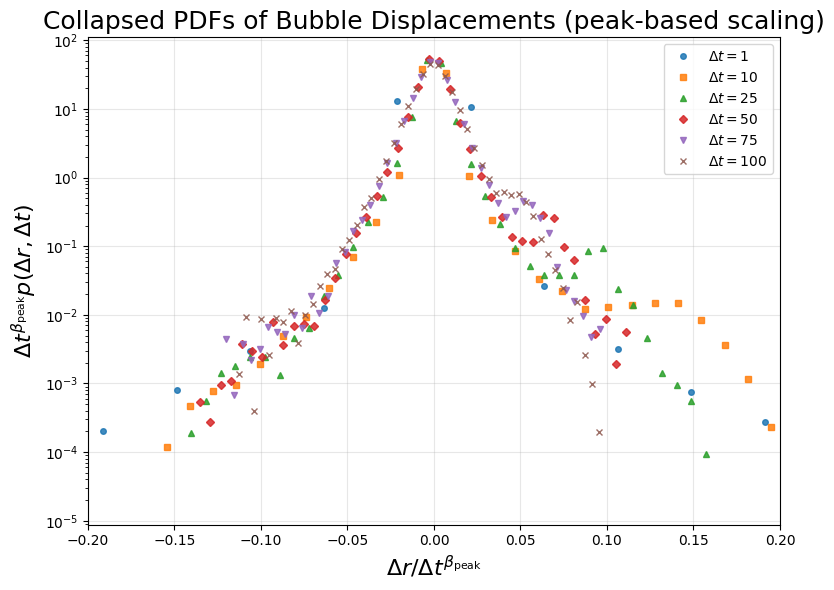

In [50]:
# ==== Collapse signed displacement PDFs for bubbles using peak-based beta ====

beta_collapse = 0.5   # from the fit above

plt.figure(figsize=(8, 6))
markers = ['o', 's', '^', 'D', 'v', 'x']

for idx, dt in enumerate(sorted(dt_values)):
    disp = get_signed_displacements_bubbles(dt)
    if disp.size == 0:
        continue

    counts, edges = np.histogram(disp, bins=bins, range=rng, density=True)
    centers = 0.5 * (edges[:-1] + edges[1:])

    # scaling factor s(dt) = dt^beta
    s_dt = dt ** beta_collapse

    x_scaled   = centers / s_dt
    pdf_scaled = counts * s_dt

    plt.plot(
        x_scaled, pdf_scaled,
        marker=markers[idx % len(markers)],
        linestyle='none',
        alpha=0.85,
        markersize=4,
        label=rf'$\Delta t = {dt}$'
    )

plt.yscale('log')   # or comment out for linear y
plt.xlabel(r"$\Delta r / \Delta t^{\beta_{\mathrm{peak}}}$", fontsize=16)
plt.ylabel(r"$\Delta t^{\beta_{\mathrm{peak}}} p(\Delta r,\Delta t)$", fontsize=16)
plt.title("Collapsed PDFs of Bubble Displacements (peak-based scaling)", fontsize=18)
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.xlim(-0.2, 0.2)
#plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures/03_Figures/displacement_pdf_collapse_beta_peakbased.png", dpi=300, bbox_inches='tight')
plt.show()

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import UnivariateSpline

# -------------------------------------------------
# Helper: signed displacements for a given Δt
# -------------------------------------------------
def get_signed_displacements_bubbles(dt):
    all_dx, all_dy = [], []
    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x = g["x"].to_numpy()
        y = g["y"].to_numpy()
        if len(x) <= dt:
            continue
        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)
    disp = np.concatenate([all_dx, all_dy])
    return disp - disp.mean()   # remove small drift


# -------------------------------------------------
# Step 1: compute peak heights p_max(Δt)
# -------------------------------------------------
bins = 80
rng  = (-1.7, 1.7)

peak_heights = {}
for dt in sorted(dt_values):
    disp = get_signed_displacements_bubbles(dt)
    if disp.size == 0:
        continue
    counts, edges = np.histogram(disp, bins=bins, range=rng, density=True)
    peak_heights[dt] = counts.max()

dts   = np.array(sorted(peak_heights.keys()))
peaks = np.array([peak_heights[dt] for dt in dts])

In [52]:
def collapse_bubble_pdfs(s_dt_func, title_suffix=""):
    """
    Collapse signed displacement PDFs using a supplied scale function s(Δt).
    """
    plt.figure(figsize=(8, 6))
    markers = ['o', 's', '^', 'D', 'v', 'x']

    for idx, dt in enumerate(sorted(dt_values)):
        disp = get_signed_displacements_bubbles(dt)
        if disp.size == 0:
            continue

        counts, edges = np.histogram(disp, bins=bins, range=rng, density=True)
        centers = 0.5 * (edges[:-1] + edges[1:])
        
        s_dt = s_dt_func(dt)

        x_scaled   = centers / s_dt
        pdf_scaled = counts * s_dt

        plt.plot(
            x_scaled, pdf_scaled,
            marker=markers[idx % len(markers)],
            linestyle='none',
            alpha=0.85,
            markersize=4,
            label=rf'$\Delta t = {dt}$'
        )

    plt.yscale('log')
    plt.xlabel(r"$\Delta r / s(\Delta t)$", fontsize=16)
    plt.ylabel(r"$s(\Delta t)\, p(\Delta r,\Delta t)$", fontsize=16)
    plt.title(f"Collapsed PDFs of Bubble Displacements\n{title_suffix}", fontsize=16)
    plt.grid(alpha=0.3)
    plt.legend()
    plt.tight_layout()
    plt.xlim(-10,10)
    #plt.savefig(f"/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures/03_Figures/{title_suffix}_pdf_collapse.png", dpi=300, bbox_inches='tight')
    plt.show()

### Method 1 – Two-regime power-law peak model

Idea:
Approximate the peak height as a corrected power law

$p_{\max}(\Delta t) \approx A\,\Delta t^{-\beta_1}\left(1 + B\,\Delta t^{\gamma}\right)$,

which allows curvature in log–log space (crossover between two regimes).
Then define the scale as $s(\Delta t) = 1 / p_{\max}(\Delta t)$.

Method 1 fit params:
  A1     = 11.81
  beta1  = 0.1639
  B1     = 0.1905
  gamma1 = -6.921e-05


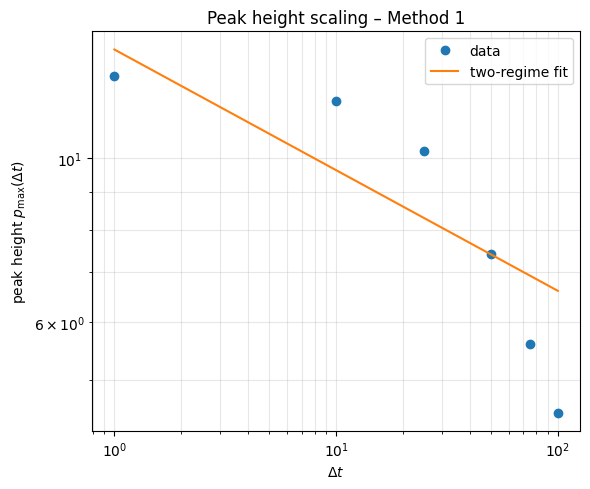

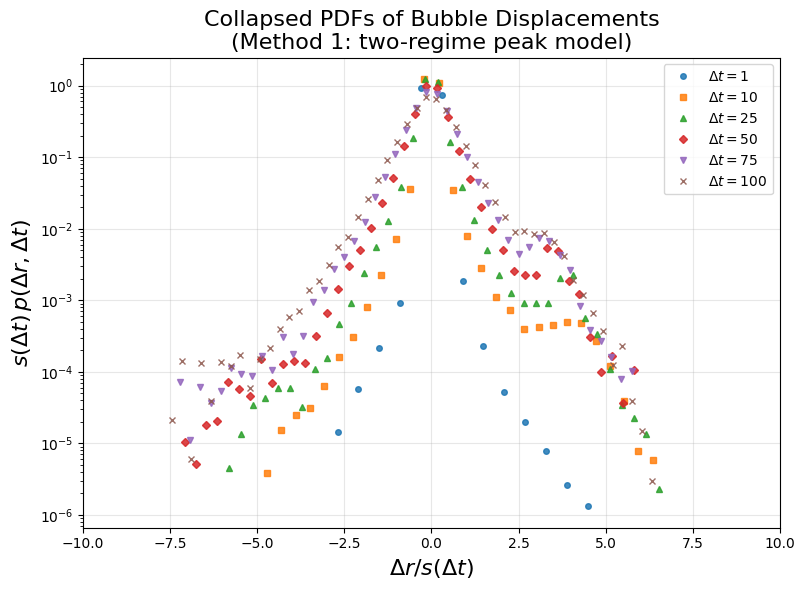

In [53]:
# ----------------------------------------
# Method 1: two-regime power-law fit
# ----------------------------------------

def pmax_model(dt, A, beta1, B, gamma):
    return A * dt**(-beta1) * (1.0 + B * dt**gamma)

# initial guesses: tweak if needed
p0 = [peaks[0], 0.5, 0.1, -0.5]

popt1, pcov1 = curve_fit(pmax_model, dts, peaks, p0=p0, maxfev=10000)
A1, beta1, B1, gamma1 = popt1
print("Method 1 fit params:")
print(f"  A1     = {A1:.4g}")
print(f"  beta1  = {beta1:.4g}")
print(f"  B1     = {B1:.4g}")
print(f"  gamma1 = {gamma1:.4g}")

# plot fit quality
plt.figure(figsize=(6,5))
plt.loglog(dts, peaks, 'o', label='data')
dt_fit = np.logspace(np.log10(dts.min()), np.log10(dts.max()), 200)
plt.loglog(dt_fit, pmax_model(dt_fit, *popt1), '-', label='two-regime fit')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'peak height $p_{\max}(\Delta t)$')
plt.title("Peak height scaling – Method 1")
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.show()

# scaling function s(Δt) for method 1
def s_dt_method1(dt):
    return 1.0 / pmax_model(np.asarray(dt, dtype=float), *popt1)

# collapse plot
collapse_bubble_pdfs(s_dt_method1, title_suffix="(Method 1: two-regime peak model)")

### Method 2 – Smooth spline for width vs time

Idea:
Use the observed width/scale directly from the data:

$s(\Delta t) \equiv \frac{1}{p_{\max}(\Delta t)}$,

fit a smooth spline to $\log s$ vs $\log \Delta t$, and then evaluate that spline for each Δt.
This makes no strong assumption about functional form; it just imposes smoothness.

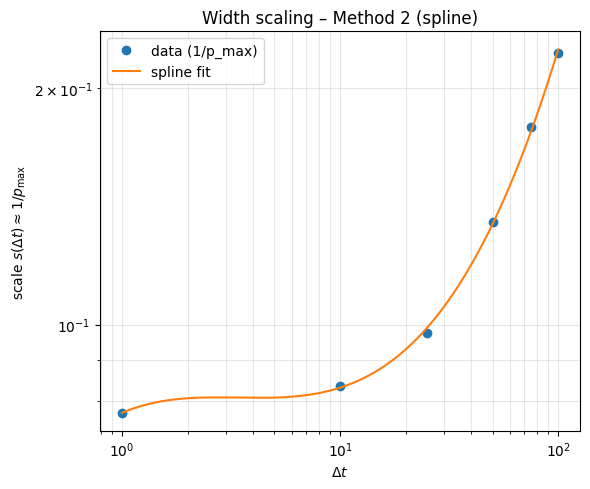

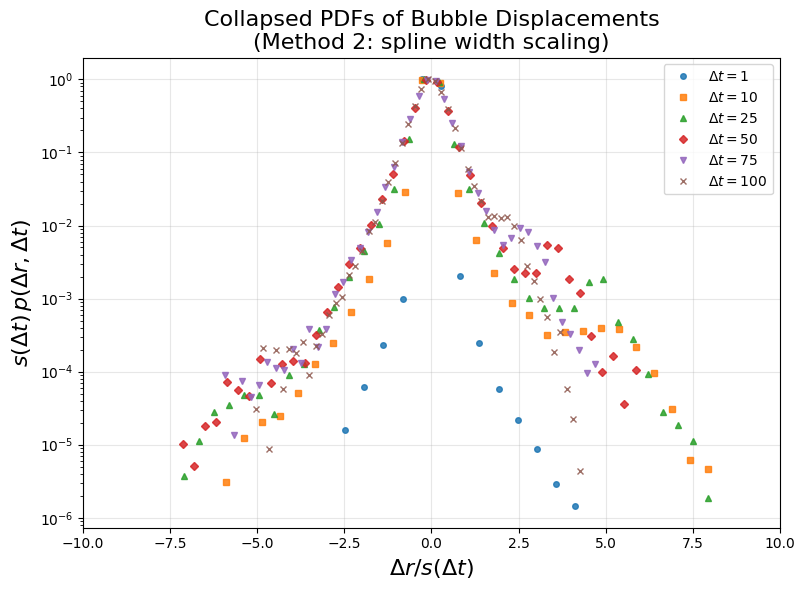

In [54]:
# ----------------------------------------
# Method 2: spline fit for width
# ----------------------------------------
widths = 1.0 / peaks

# spline in log–log space
log_dt   = np.log(dts)
log_w    = np.log(widths)

# smoothing parameter s controls how wiggly vs smooth; adjust if necessary
spline = UnivariateSpline(log_dt, log_w, s=0.1)

def s_dt_method2(dt):
    dt = np.asarray(dt, dtype=float)
    return np.exp(spline(np.log(dt)))

# visualise the width fit
plt.figure(figsize=(6,5))
plt.loglog(dts, widths, 'o', label='data (1/p_max)')
dt_fit = np.logspace(np.log10(dts.min()), np.log10(dts.max()), 200)
plt.loglog(dt_fit, s_dt_method2(dt_fit), '-', label='spline fit')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'scale $s(\Delta t) \approx 1/p_{\max}$')
plt.title("Width scaling – Method 2 (spline)")
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
#plt.savefig("/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures/03_Figures/spline_width_scaling.png", dpi=300, bbox_inches='tight')
plt.show()

# collapse plot
collapse_bubble_pdfs(s_dt_method2, title_suffix="(Method 2: spline width scaling)")


### Method 3 – Quadratic fit in log–log space

Idea:
Fit $\log p_{\max}$ as a quadratic function of $\log \Delta t$:

$\log p_{\max}(\Delta t)
= a_0 + a_1 \log \Delta t + a_2 (\log \Delta t)^2$,

which corresponds to a log–log parabola, capturing smooth curvature.
Then again define $s(\Delta t) = 1 / p_{\max}(\Delta t)$.

Method 3 quadratic fit:
  log p_max ≈ -0.0949 (log t)^2 + 0.2189 log t + 2.551


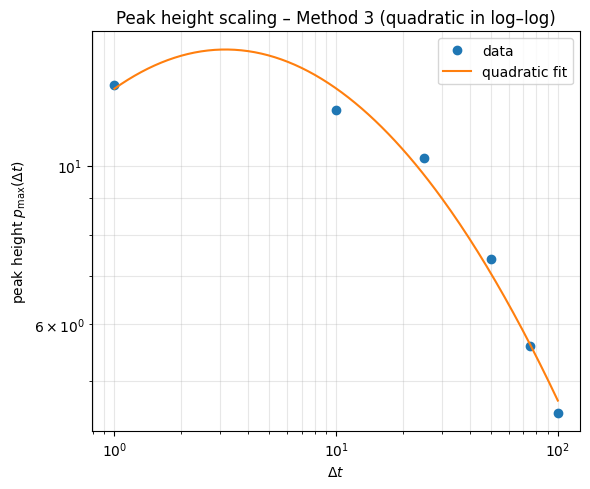

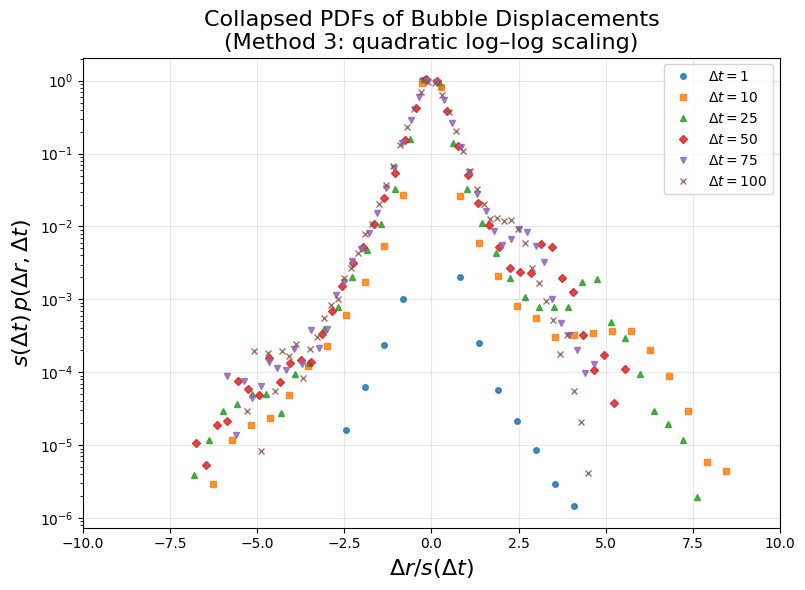

In [55]:
# ----------------------------------------
# Method 3: quadratic in log–log
# ----------------------------------------
log_dt = np.log(dts)
log_p  = np.log(peaks)

coeffs = np.polyfit(log_dt, log_p, 2)  # a2, a1, a0
a2, a1, a0 = coeffs
print("Method 3 quadratic fit:")
print(f"  log p_max ≈ {a2:.4g} (log t)^2 + {a1:.4g} log t + {a0:.4g}")

def pmax_quad(dt):
    dt = np.asarray(dt, dtype=float)
    ld = np.log(dt)
    log_p_pred = a2*ld**2 + a1*ld + a0
    return np.exp(log_p_pred)

def s_dt_method3(dt):
    return 1.0 / pmax_quad(dt)

# visualise quadratic fit
plt.figure(figsize=(6,5))
plt.loglog(dts, peaks, 'o', label='data')
dt_fit = np.logspace(np.log10(dts.min()), np.log10(dts.max()), 200)
plt.loglog(dt_fit, pmax_quad(dt_fit), '-', label='quadratic fit')
plt.xlabel(r'$\Delta t$')
plt.ylabel(r'peak height $p_{\max}(\Delta t)$')
plt.title("Peak height scaling – Method 3 (quadratic in log–log)")
plt.grid(alpha=0.3, which='both')
plt.legend()
plt.tight_layout()
plt.show()

# collapse plot
collapse_bubble_pdfs(s_dt_method3, title_suffix="(Method 3: quadratic log–log scaling)")

## Verification of Sorting Algorithm 👍

Testing the accuracy of the sorting algorithm by computing the complementary cumulative distribution function (CCDF) using two different numerical integration methods: Simpson's rule and the trapezoidal rule. This comparison validates the consistency of the data sorting and integration approaches.

/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_4599/3657867139.py:77: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  cdf_simps_raw[k] = simps(pdf[:k+1], bin_centers[:k+1])


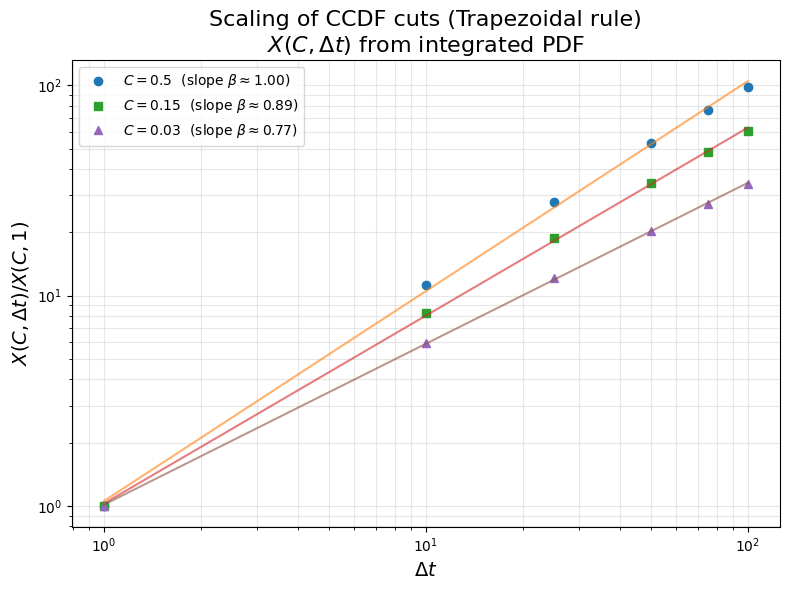

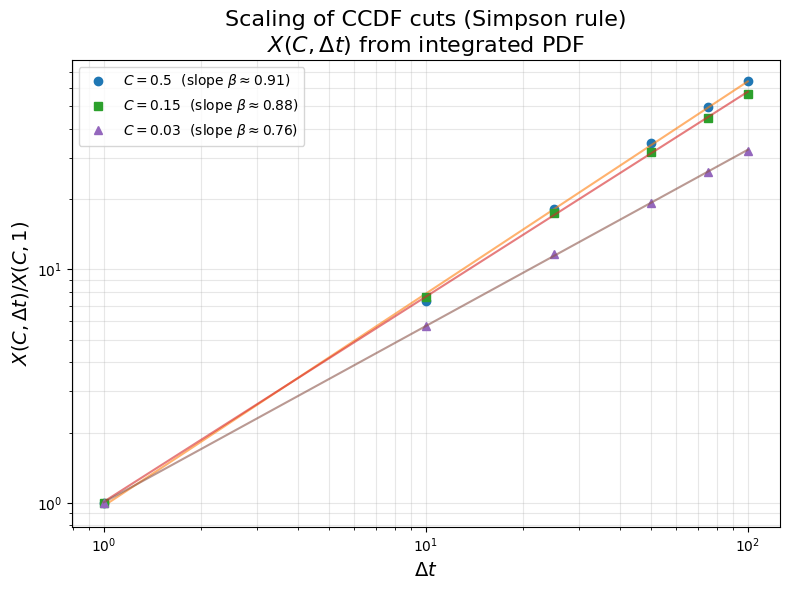

In [56]:
from scipy.integrate import simps, cumulative_trapezoid
import matplotlib.pyplot as plt

# === Parameters ===
C_vals = [0.50, 0.15, 0.03]       # CCDF levels
markers = ['o', 's', '^', 'D', 'v', 'x']
radial = False                    # False: |Δx|,|Δy| pooled; True: radial sqrt(dx^2+dy^2)
n_bins = 160                       # number of bins for |Δ| histogram

dt_plot_order = sorted(dt_values)
if 1 not in dt_plot_order:
    raise ValueError("Need Δt = 1 in dt_values to form the normalization ratio.")

# --- Helper: get |Δ| samples for a given dt ---
def get_abs_displacements(dt, radial=False):
    all_dx, all_dy = [], []
    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x, y = g["x"].to_numpy(), g["y"].to_numpy()
        if len(x) <= dt:
            continue
        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)

    if len(all_dx) == 0:
        return np.array([])

    all_dx = np.asarray(all_dx)
    all_dy = np.asarray(all_dy)

    if radial:
        vals = np.sqrt(all_dx**2 + all_dy**2)
    else:
        vals = np.abs(np.concatenate([all_dx, all_dy]))

    return np.abs(vals)


# --- Step 1: Build PDF and CCDF (trapz & simps) for each dt ---

ccdf_trapz = {}   # dt -> (x_grid, CCDF_trapz)
ccdf_simps = {}   # dt -> (x_grid, CCDF_simps)

for dt in dt_plot_order:
    vals = get_abs_displacements(dt, radial=radial)
    if vals.size == 0:
        continue

    # Histogram of |Δ|
    max_val = np.quantile(vals, 0.999)  # avoid extreme outliers
    counts, bin_edges = np.histogram(vals, bins=n_bins, range=(0, max_val))
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    dx = np.diff(bin_edges)             # bin widths (should all be equal here)

    # Build PDF from histogram: normalize so total area = 1
    pdf_unnorm = counts.astype(float) # pdf - probability density function
    area = np.sum(pdf_unnorm * dx)
    if area == 0:
        continue
    pdf = pdf_unnorm / area

    # ---- Trapezoidal CDF/CCDF ----
    # cumulative integral from 0 to x of pdf(x') dx'
    cdf_trap = cumulative_trapezoid(pdf, bin_centers, initial=0.0)
    # normalize in case of small numerical errors
    cdf_trap /= cdf_trap[-1]
    ccdf_tr = 1.0 - cdf_trap

    ccdf_trapz[dt] = (bin_centers, ccdf_tr)

    # ---- Simpson CDF/CCDF ----
    # cumulative integral using Simpson's rule
    cdf_simps_raw = np.zeros_like(bin_centers)
    for k in range(2, len(bin_centers)):   # need at least 3 points for simps
        cdf_simps_raw[k] = simps(pdf[:k+1], bin_centers[:k+1])
    # normalize to end at 1
    cdf_simps = cdf_simps_raw / cdf_simps_raw[-1]
    ccdf_sm = 1.0 - cdf_simps

    ccdf_simps[dt] = (bin_centers, ccdf_sm)


# Step 2: For each method, compute X(C, dt) via CCDF(X) = C our cuts
def extract_XC_from_ccdf(ccdf_dict, C_vals):
    """
    ccdf_dict: dt -> (x_grid, CCDF(x))
    returns: dict C -> dict dt -> X(C, dt)
    """
    X_C_dt = {C: {} for C in C_vals}
    for dt, (x_grid, ccdf_vals) in ccdf_dict.items():
        # CCDF(x) is decreasing from ~1 to 0
        # For np.interp we need increasing x, but can directly use reversed arrays:
        x_rev = x_grid[::-1]
        ccdf_rev = ccdf_vals[::-1]  # now CCDF increases from 0 -> 1
        for C in C_vals:
            # find X such that CCDF(X) = C
            X_C = np.interp(C, ccdf_rev, x_rev)
            X_C_dt[C][dt] = float(X_C)
    return X_C_dt


X_C_dt_trapz = extract_XC_from_ccdf(ccdf_trapz, C_vals)
X_C_dt_simps = extract_XC_from_ccdf(ccdf_simps, C_vals)

# Ensure dt=1 present for both methods
if 1 not in ccdf_trapz or 1 not in ccdf_simps:
    raise ValueError("dt = 1 missing for one of the methods; cannot normalize.")



# --- Step 3: Scaling plots X(C, dt)/X(C, 1) vs dt for each method ---

methods = {
    "Trapezoidal": X_C_dt_trapz,
    "Simpson": X_C_dt_simps
}

for method_name, X_C_dt in methods.items():
    plt.figure(figsize=(8, 6))

    for i, C in enumerate(C_vals):
        dts = np.array(sorted(X_C_dt[C].keys()))
        Xs  = np.array([X_C_dt[C][dt] for dt in dts])

        X1 = X_C_dt[C][1]    # normalization by Δt = 1
        ratio = Xs / X1

        # log–log fit: ratio ≈ A * dt^β
        log_dts = np.log(dts)
        log_ratio = np.log(ratio)
        coeffs = np.polyfit(log_dts, log_ratio, 1)
        beta = coeffs[0]
        logA = coeffs[1]
        A = np.exp(logA)
        fit_curve = A * dts**beta

        plt.loglog(
            dts, ratio,
            marker=markers[i % len(markers)],
            linestyle='none',
            label=fr'$C={C}$  (slope $\beta \approx {beta:.2f}$)'
        )
        plt.loglog(dts, fit_curve, linestyle='-', alpha=0.6)

    plt.xlabel(r'$\Delta t$', fontsize=14)
    plt.ylabel(r'$X(C,\Delta t)/X(C,1)$', fontsize=14)
    plt.title(
        f"Scaling of CCDF cuts ({method_name} rule)\n"
        r"$X(C,\Delta t)$ from integrated PDF",
        fontsize=16
    )
    plt.grid(alpha=0.3, which='both')
    plt.legend()
    plt.tight_layout()
    # Example save:
    # plt.savefig(f".../ccdf_cut_scaling_{method_name.lower()}.png", dpi=300, bbox_inches='tight')
    plt.show()

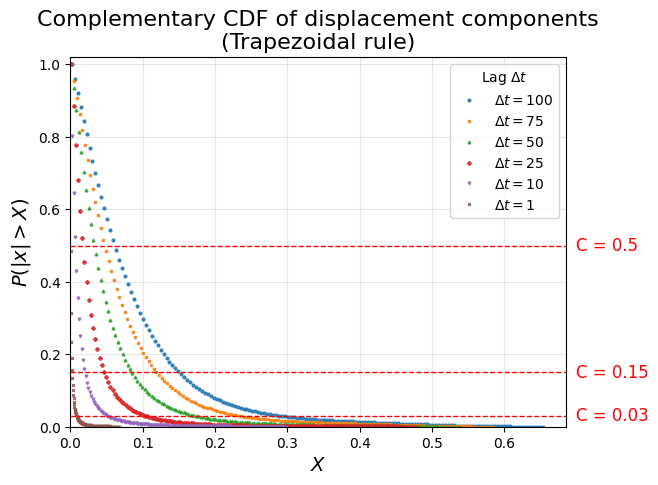

/var/folders/l1/x0797x3512d9sktcpm47npbh0000gn/T/ipykernel_4599/35562663.py:61: DeprecationWarning: 'scipy.integrate.simps' is deprecated in favour of 'scipy.integrate.simpson' and will be removed in SciPy 1.14.0
  cdf_raw[k] = simps(pdf[:k+1], bin_centers[:k+1])


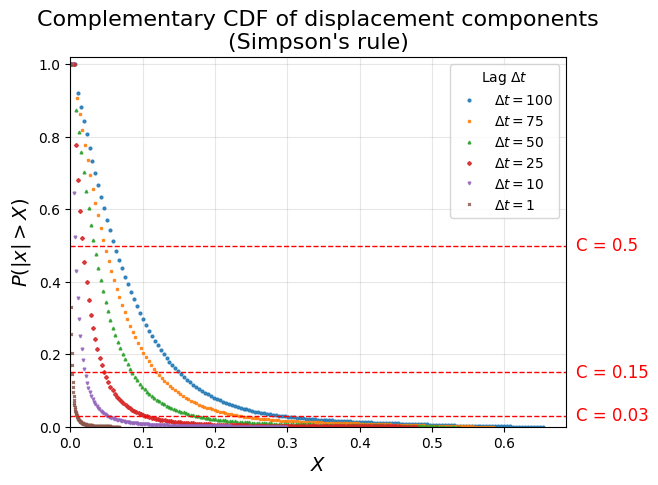

In [57]:
from scipy.integrate import simps, cumulative_trapezoid

plt.close('all')


n_bins = 160   # histogram bins for |Δ|

# --- Step 1: precompute |Δ| samples per dt (components, as in your original plot) ---
dt_plot_order = sorted(dt_values, reverse=True)
abs_vals_by_dt = {}

for dt in dt_plot_order:
    all_dx, all_dy = [], []

    for bubble_id, g in df_corrected.groupby("id"):
        g = g.sort_values("timestep").copy()
        x, y = g["x"].to_numpy(), g["y"].to_numpy()
        if len(x) <= dt:
            continue

        dx_dt = x[dt:] - x[:-dt]
        dy_dt = y[dt:] - y[:-dt]
        all_dx.extend(dx_dt)
        all_dy.extend(dy_dt)

    if len(all_dx) == 0:
        continue

    disp = np.concatenate([all_dx, all_dy])
    vals = np.abs(disp)
    abs_vals_by_dt[dt] = vals


# --- Step 2: helper to compute CCDF from PDF using a chosen rule ---
def ccdf_from_pdf(vals, rule="trapz", n_bins=80):
    """
    vals: 1D array of |Δ| samples
    rule: "trapz" or "simps"
    returns: (X, CCDF(X)) with X = bin centers
    """
    # restrict tail to avoid crazy outliers
    max_val = np.quantile(vals, 0.999)
    counts, bin_edges = np.histogram(vals, bins=n_bins, range=(0, max_val))
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    dx = np.diff(bin_edges)

    pdf_unnorm = counts.astype(float)
    area = np.sum(pdf_unnorm * dx)
    if area == 0:
        return bin_centers, np.zeros_like(bin_centers)
    pdf = pdf_unnorm / area

    if rule == "trapz":
        # cumulative trapezoidal CDF
        cdf = cumulative_trapezoid(pdf, bin_centers, initial=0.0)
        cdf /= cdf[-1]  # normalize to 1
    elif rule == "simps":
        # cumulative Simpson CDF (incremental)
        cdf_raw = np.zeros_like(bin_centers, dtype=float)
        for k in range(2, len(bin_centers)):  # need at least 3 points
            cdf_raw[k] = simps(pdf[:k+1], bin_centers[:k+1])
        cdf = cdf_raw / cdf_raw[-1]
    else:
        raise ValueError("rule must be 'trapz' or 'simps'")

    ccdf = 1.0 - cdf
    return bin_centers, ccdf


# --- Step 3: make the plots for each integration rule ---

methods = {
    "Trapezoidal rule": "trapz",
    "Simpson's rule": "simps"
}

for method_name, rule in methods.items():
    #plt.figure(figsize=(8, 6))

    # plot largest dt first so it's on top in legend
    for idx, dt in enumerate(sorted(abs_vals_by_dt.keys(), reverse=True)):
        vals = abs_vals_by_dt[dt]
        X, CCDF = ccdf_from_pdf(vals, rule=rule, n_bins=n_bins)

        plt.plot(
            X, CCDF,
            marker=markers[idx % len(markers)],
            linestyle='none',
            ms=2, alpha=0.85,
            label=rf'$\Delta t = {dt}$'
        )

    # dashed horizontal C lines
    x_max = plt.xlim()[1] if plt.xlim()[1] > 0 else max(
        np.quantile(v, 0.999) for v in abs_vals_by_dt.values()
    )
    for C in C_vals:
        plt.axhline(y=C, color='red', linestyle='--', linewidth=1)
        plt.text(
            1.02 * x_max, C, f"C = {C}",
            va='center', ha='left', fontsize=12, color='red'
        )

    # axis scaling and labels
    plt.ylim(0, 1.02)
    plt.xlim(left=0)
    plt.ylabel(r"$P(|x|>X)$", fontsize=14)
    plt.xlabel(r"$X$", fontsize=14)
    plt.title(f"Complementary CDF of displacement components\n({method_name})", fontsize=16)
    plt.grid(alpha=0.3)
    plt.legend(title=r"Lag $\Delta t$")
    #plt.savefig(f"/Users/conorkirby/Library/Mobile Documents/com~apple~CloudDocs/Coding/projects/python/capstone/Figures/03_Figures/ccdf_displacement_components_{method_name}.png", dpi=300, bbox_inches='tight')
    plt.show()
    # e.g. save if you like:
    # plt.savefig(f".../ccdf_displacement_components_{rule}.png", dpi=300, bbox_inches='tight')
   



   # log returns